Output variable -> y
y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder,StandardScaler,LabelEncoder
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [62]:
df = pd.read_csv('bank-full.csv',sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [63]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [65]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [66]:
df.duplicated().sum()

0

# Encoding

In [67]:
cat_df = df.select_dtypes(object).columns
cat_df

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [68]:
oe = OrdinalEncoder()

In [69]:
df[cat_df] = oe.fit_transform(df[cat_df])

In [70]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4.0,1.0,2.0,0.0,2143,1.0,0.0,2.0,5,8.0,261,1,-1,0,3.0,0.0
1,44,9.0,2.0,1.0,0.0,29,1.0,0.0,2.0,5,8.0,151,1,-1,0,3.0,0.0
2,33,2.0,1.0,1.0,0.0,2,1.0,1.0,2.0,5,8.0,76,1,-1,0,3.0,0.0
3,47,1.0,1.0,3.0,0.0,1506,1.0,0.0,2.0,5,8.0,92,1,-1,0,3.0,0.0
4,33,11.0,2.0,3.0,0.0,1,0.0,0.0,2.0,5,8.0,198,1,-1,0,3.0,0.0


In [71]:
from sklearn.model_selection import train_test_split

In [73]:
x = df.iloc[:,0:-1]
y = df['y']

In [82]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [83]:
xtrain

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
22468,52,4.0,1.0,2.0,0.0,0,0.0,0.0,0.0,22,1.0,232,2,-1,0,3.0
6896,50,0.0,2.0,1.0,0.0,330,1.0,0.0,2.0,28,8.0,24,1,-1,0,3.0
28408,45,1.0,1.0,0.0,0.0,300,1.0,0.0,0.0,29,4.0,203,1,261,3,0.0
8481,38,9.0,1.0,1.0,0.0,27,1.0,0.0,2.0,3,6.0,404,4,-1,0,3.0
28753,31,7.0,2.0,1.0,0.0,887,0.0,0.0,0.0,30,4.0,427,1,-1,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43723,50,9.0,1.0,2.0,0.0,1830,0.0,0.0,0.0,14,8.0,318,3,-1,0,3.0
32511,34,4.0,0.0,2.0,0.0,528,1.0,0.0,0.0,17,0.0,233,2,-1,0,3.0
5192,48,4.0,1.0,2.0,0.0,4191,0.0,0.0,2.0,21,8.0,363,6,-1,0,3.0
12172,45,0.0,1.0,3.0,0.0,1783,0.0,0.0,2.0,20,6.0,11,11,-1,0,3.0


In [84]:
ytrain

22468    0.0
6896     0.0
28408    0.0
8481     0.0
28753    0.0
        ... 
43723    0.0
32511    0.0
5192     0.0
12172    0.0
33003    0.0
Name: y, Length: 36168, dtype: float64

In [85]:
xtest

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
3610,42,1.0,1.0,0.0,0.0,2519,1.0,0.0,2.0,15,8.0,262,4,-1,0,3.0
11677,37,9.0,1.0,1.0,0.0,2209,0.0,0.0,2.0,20,6.0,167,2,-1,0,3.0
33018,32,0.0,1.0,1.0,0.0,923,1.0,0.0,0.0,17,0.0,819,4,-1,0,3.0
44323,53,1.0,1.0,0.0,0.0,306,0.0,0.0,0.0,28,5.0,388,3,181,1,2.0
8119,32,9.0,2.0,2.0,0.0,257,1.0,0.0,2.0,2,6.0,183,5,-1,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22959,56,3.0,1.0,0.0,0.0,0,0.0,0.0,0.0,26,1.0,102,2,-1,0,3.0
26059,33,7.0,2.0,1.0,0.0,3910,1.0,0.0,0.0,19,9.0,676,2,-1,0,3.0
18593,44,11.0,1.0,3.0,0.0,1317,0.0,0.0,1.0,31,5.0,444,6,-1,0,3.0
6959,31,4.0,2.0,2.0,0.0,305,1.0,0.0,2.0,28,8.0,297,14,-1,0,3.0


In [86]:
ytest

3610     0.0
11677    0.0
33018    0.0
44323    1.0
8119     0.0
        ... 
22959    0.0
26059    0.0
18593    0.0
6959     0.0
33795    1.0
Name: y, Length: 9043, dtype: float64

# model building

In [87]:
lg = LogisticRegression()

In [88]:
lg.fit(xtrain,ytrain)
ypred = lg.predict(xtest)

In [89]:
print(xtest.shape)
print(ypred.shape)

(9043, 16)
(9043,)


In [92]:
ypred

array([0., 0., 0., ..., 0., 0., 0.])

In [93]:
from sklearn.metrics import classification_report,confusion_matrix

In [94]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94      7993
         1.0       0.55      0.18      0.27      1050

    accuracy                           0.89      9043
   macro avg       0.73      0.58      0.60      9043
weighted avg       0.86      0.89      0.86      9043



In [95]:
confusion_matrix(ytest,ypred)

array([[7841,  152],
       [ 864,  186]], dtype=int64)

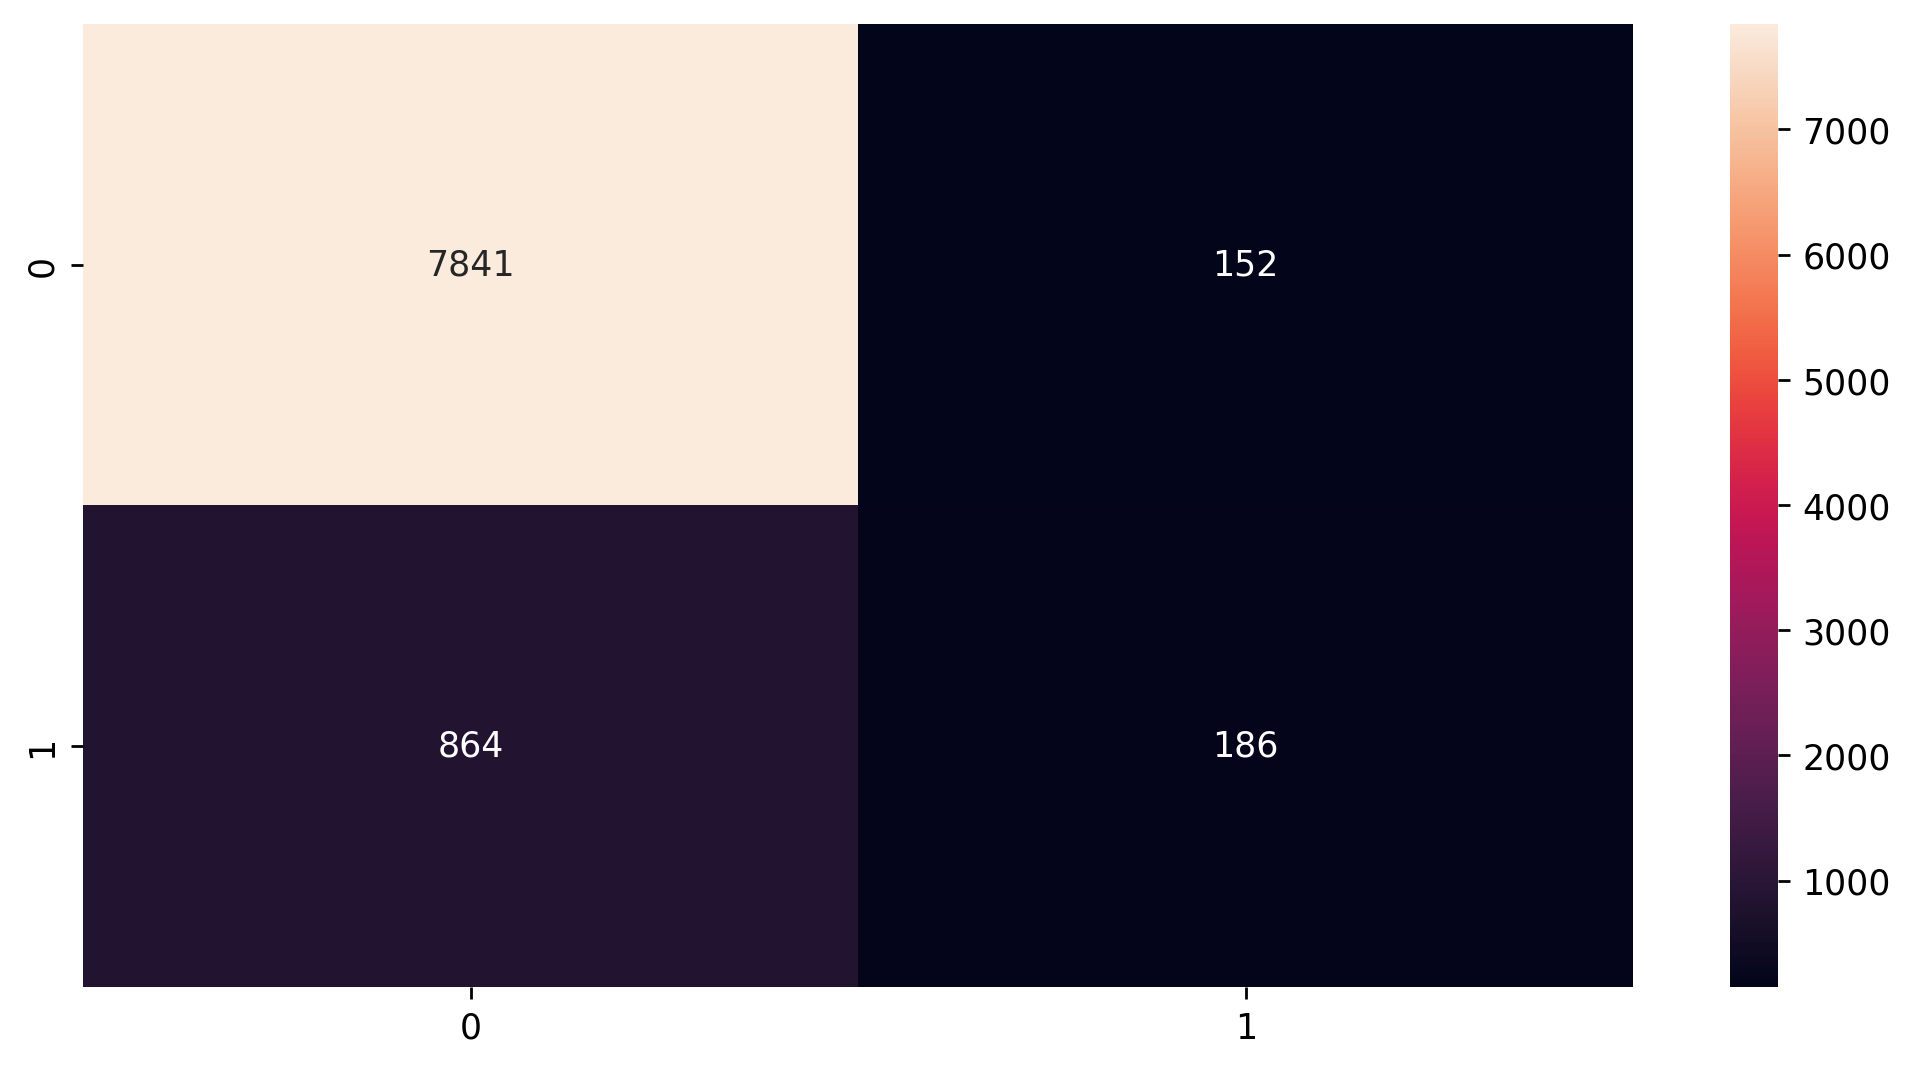

In [98]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True,fmt='0.4g')
plt.xlable = ('Actual values')
plt.ylable = ('Predicted values')

In [100]:
proba = lg.predict_proba(xtest)[:,1]

In [101]:
proba

array([0.02759255, 0.05857411, 0.37412315, ..., 0.0401817 , 0.00119991,
       0.08408238])

In [103]:
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score

In [104]:
fpr,tpr,threshold = roc_curve(ytest,proba)
auc = roc_auc_score(ytest,proba)

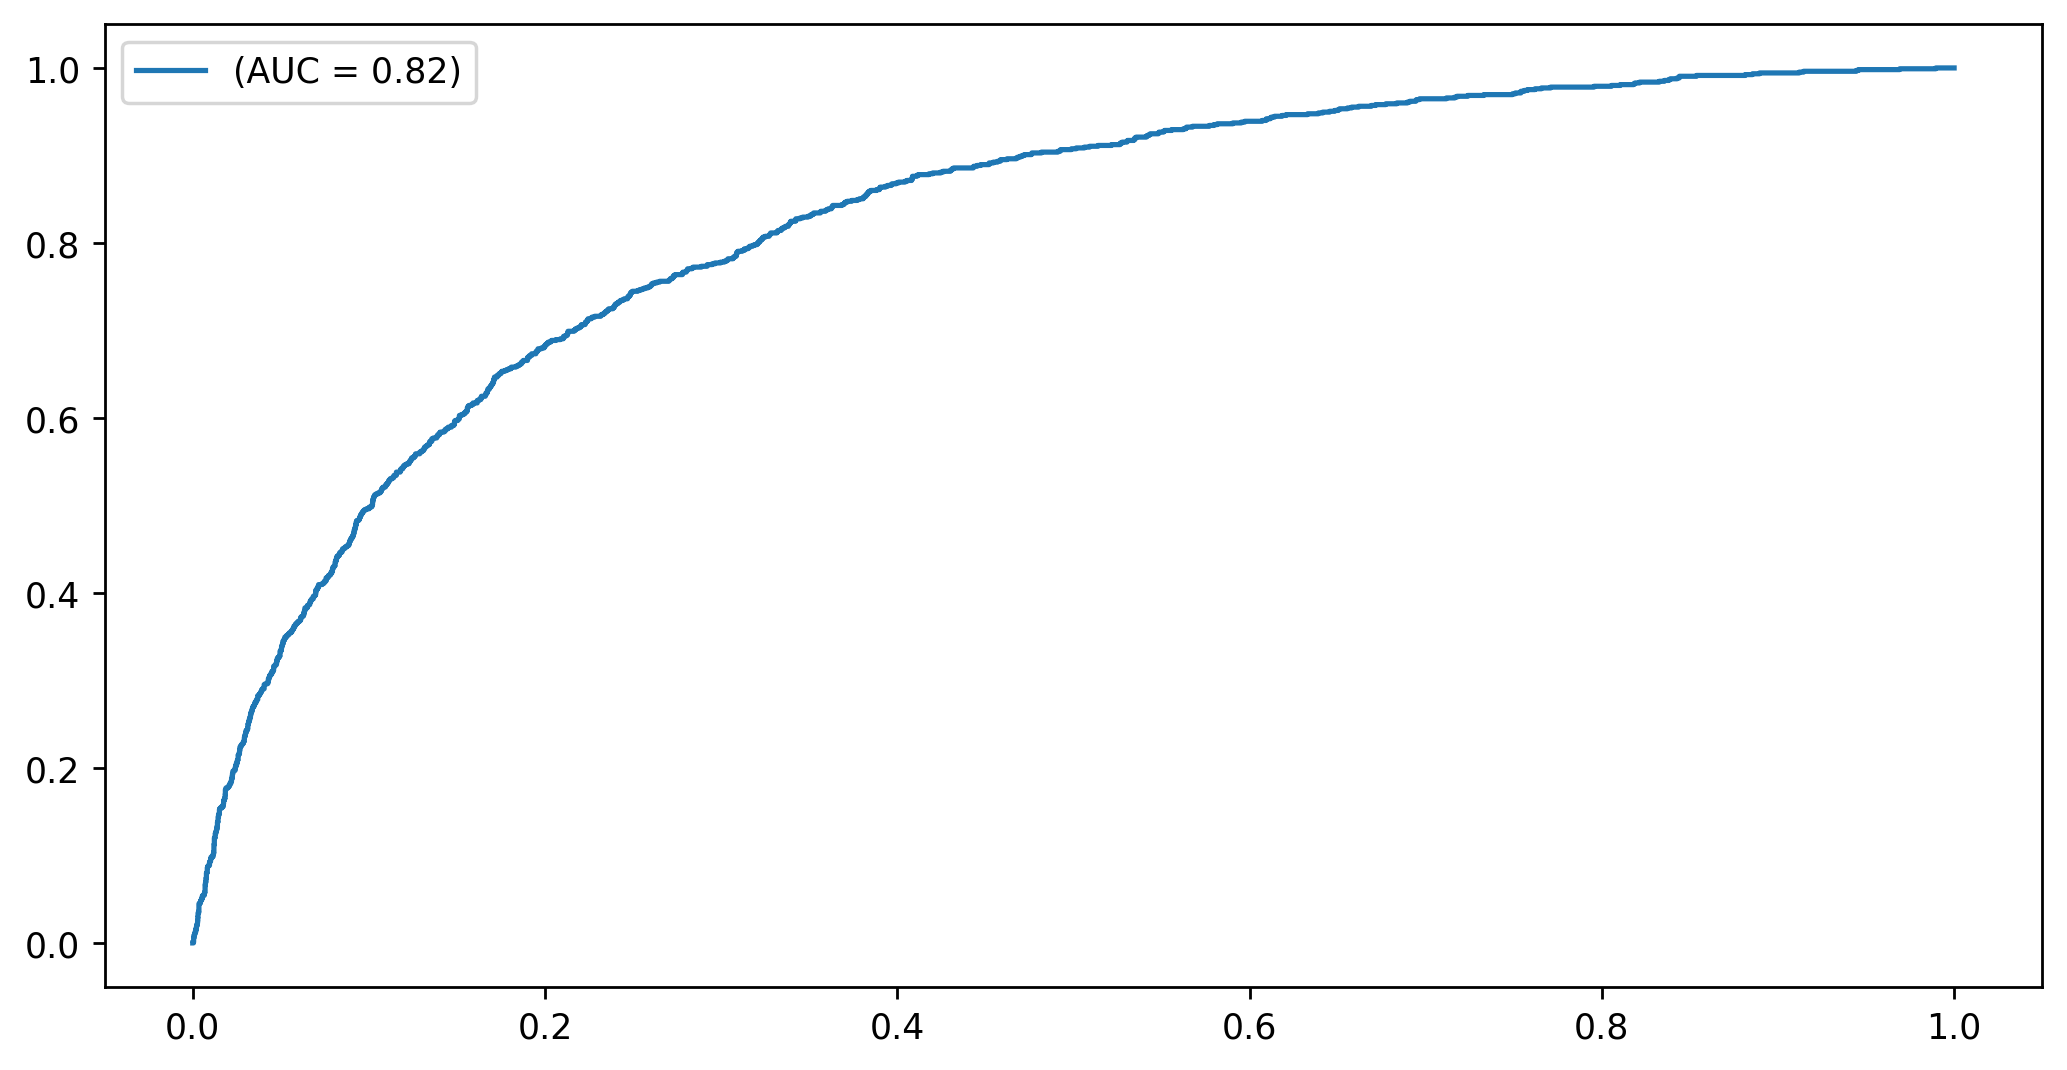

In [107]:
plt.plot(fpr,tpr,label = '(AUC = %0.2f)' %auc)
plt.legend()

In [108]:
auc

0.8192558965285102

In [109]:
threshold

array([1.99992185e+00, 9.99921855e-01, 9.97192854e-01, ...,
       5.03847241e-04, 4.99551940e-04, 3.34255726e-07])

In [110]:
len(threshold)

1535

In [112]:
accuracy = []

for i in threshold:
    ypred = np.where(proba>i,1,0)
    accuracy.append(accuracy_score(ytest,ypred))
    
    
final_threshold = pd.concat([pd.Series(threshold),pd.Series(accuracy)],axis=1)
final_threshold.columns = ['Threshold','Accuracy']

In [114]:
final_threshold.sort_values(by='Accuracy',ascending=False)

,Threshold,Accuracy
136,5.450069e-01,0.888201
137,5.450050e-01,0.888090
135,5.452024e-01,0.888090
138,5.443877e-01,0.887980
131,5.576364e-01,0.887869
...,...,...
1530,4.134123e-03,0.143315
1531,4.108270e-03,0.143205
1532,5.038472e-04,0.125290
1533,4.995519e-04,0.125180


In [115]:
from sklearn.preprocessing import binarize

In [119]:
y = binarize([proba], threshold = 5.45)[0]
y

array([0., 0., 0., ..., 0., 0., 0.])

In [120]:
print(classification_report(ytest,y))

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94      7993
         1.0       0.00      0.00      0.00      1050

    accuracy                           0.88      9043
   macro avg       0.44      0.50      0.47      9043
weighted avg       0.78      0.88      0.83      9043

